In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = '../data/featured.xlsx'
df_featured = pd.read_excel(file_path)

## Correlation Heatmap – Feature Relationships

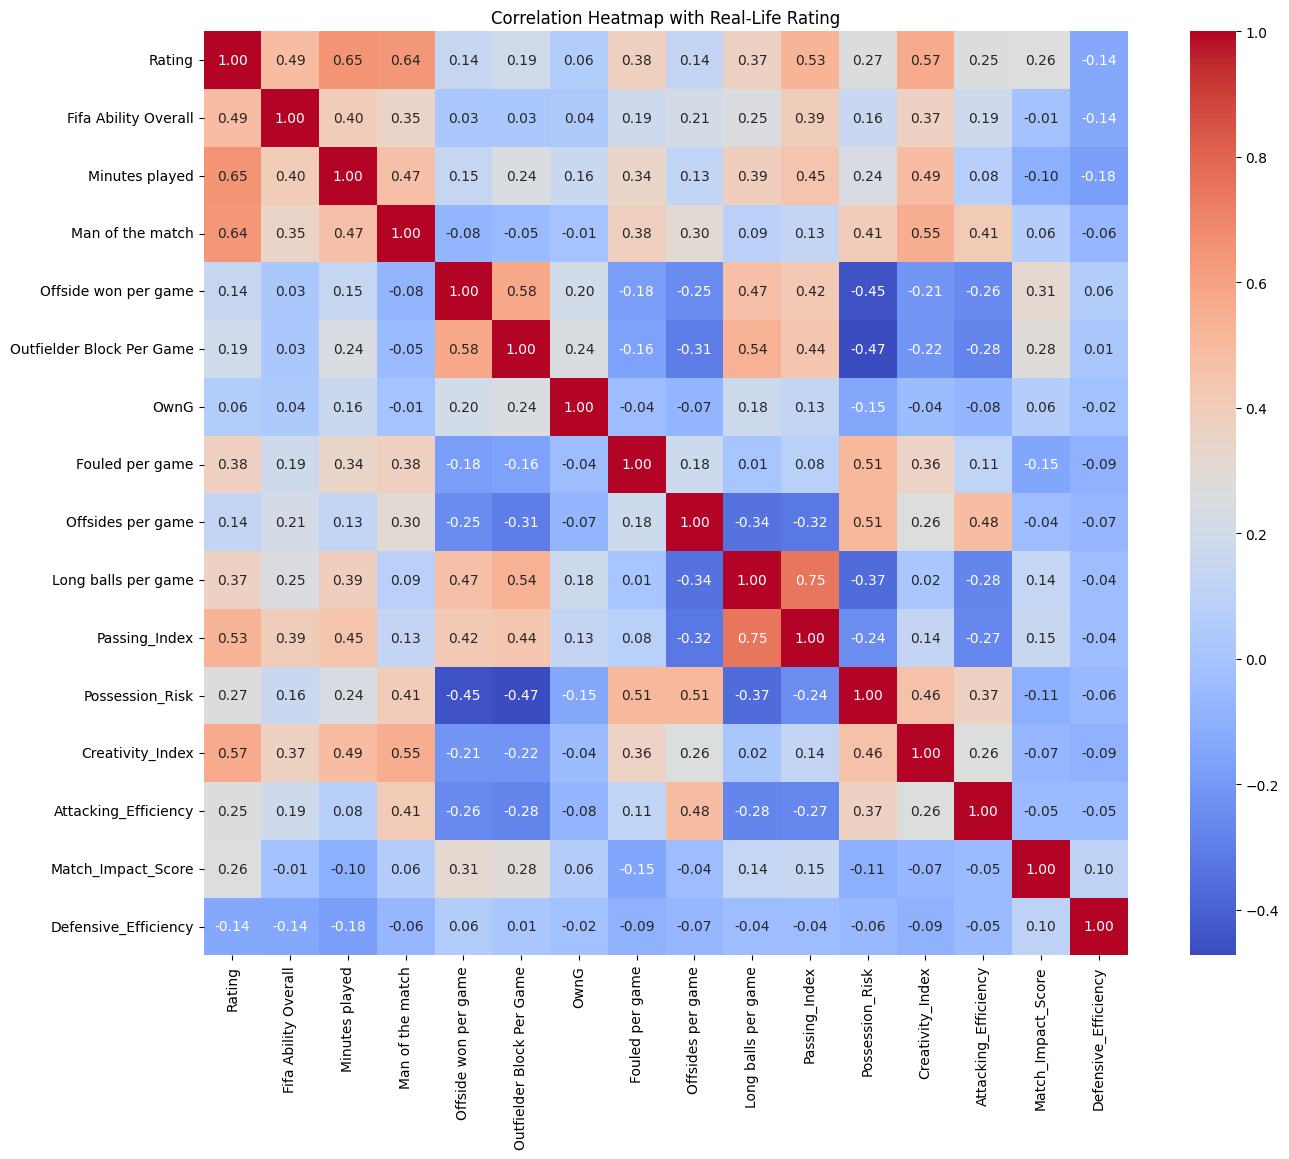

In [5]:
# Add Rating back temporarily for correlation plot
df_corr = df_featured.copy()
df_corr['Rating'] = df_featured['Rating']

# Select only numeric columns
df_corr_numeric = df_corr.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap with Real-Life Rating")
plt.show()

## Pairplot – Explore key relationships visually

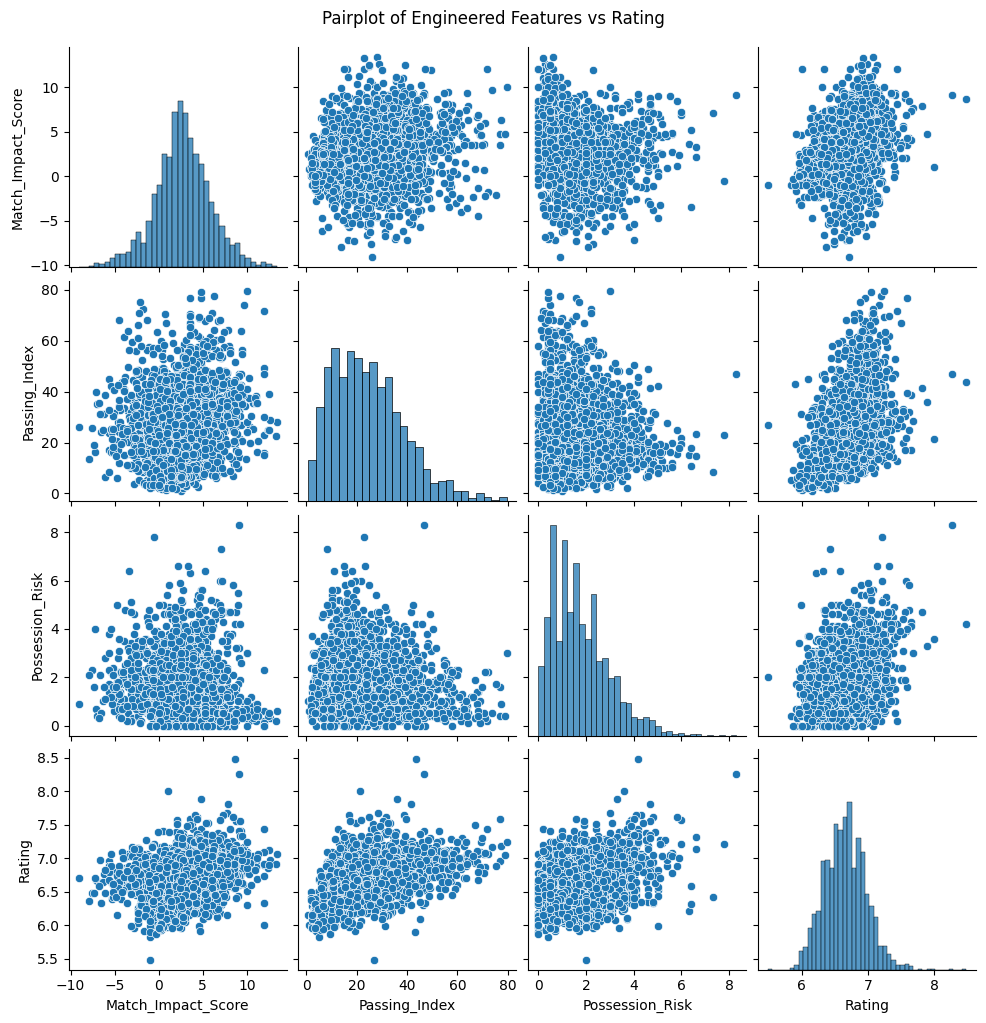

In [6]:
df_featured.columns = df_featured.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Ensure column names match the actual DataFrame columns
key_features = ['Match_Impact_Score', 'Passing_Index', 'Possession_Risk', 'Rating']

# Check if all features exist in the DataFrame
missing_features = [feature for feature in key_features if feature not in df_featured.columns]
if missing_features:
    raise KeyError(f"The following features are missing in the DataFrame: {missing_features}")

# Generate the pairplot
sns.pairplot(df_featured[key_features])
plt.suptitle("Pairplot of Engineered Features vs Rating", y=1.02)
plt.show()

## Boxplot of Rating by Simplified Position – Performance by Role

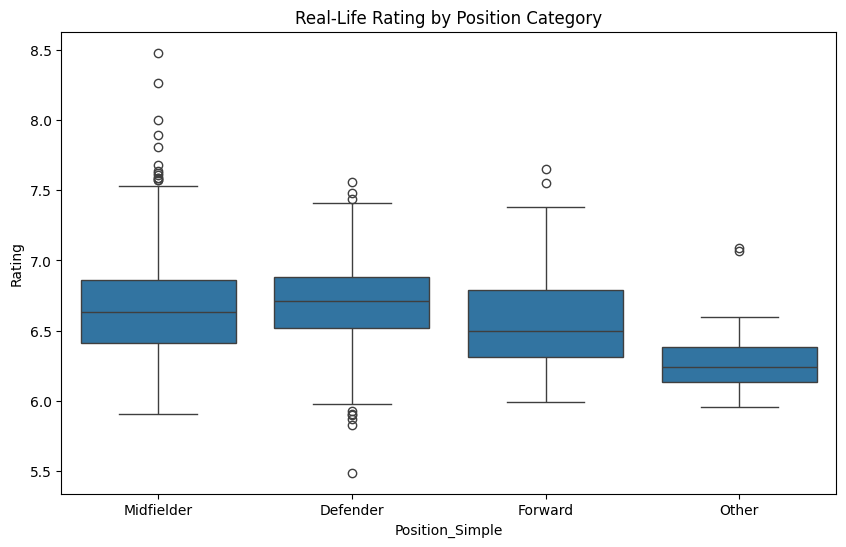

In [7]:
def simplify_position(pos):
    if 'D' in pos and not 'DM' in pos: return 'Defender'
    if 'M' in pos: return 'Midfielder'
    if 'FW' in pos: return 'Forward'
    return 'Other'

df_corr['Position_Simple'] = df_featured['Position'].apply(simplify_position)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_corr, x='Position_Simple', y='Rating')
plt.title("Real-Life Rating by Position Category")
plt.show()


## Distribution Plot of Rating – Target Distribution Insight

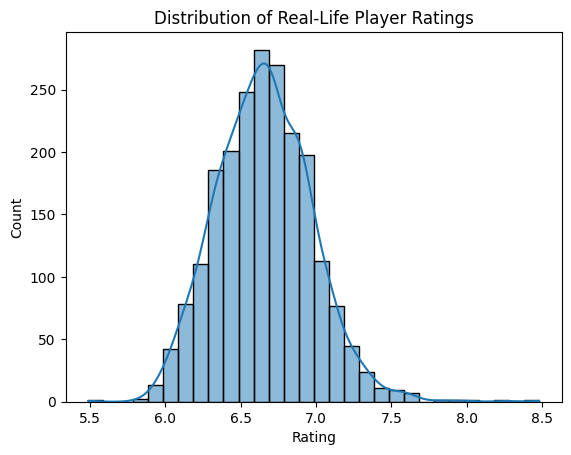

In [8]:
sns.histplot(df_featured['Rating'], kde=True, bins=30)
plt.title("Distribution of Real-Life Player Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

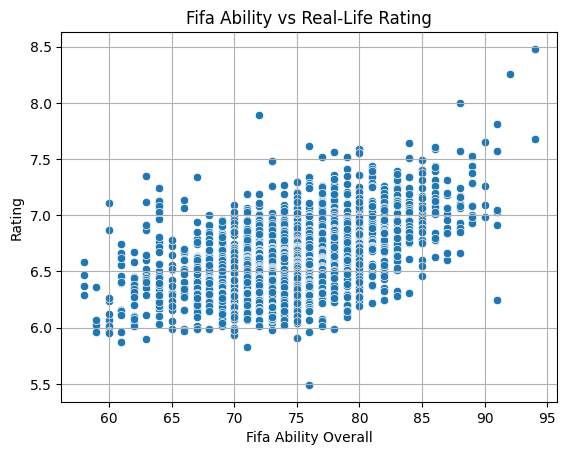

In [9]:
sns.scatterplot(data=df_featured, x='Fifa Ability Overall', y='Rating')
plt.title("Fifa Ability vs Real-Life Rating")
plt.xlabel("Fifa Ability Overall")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

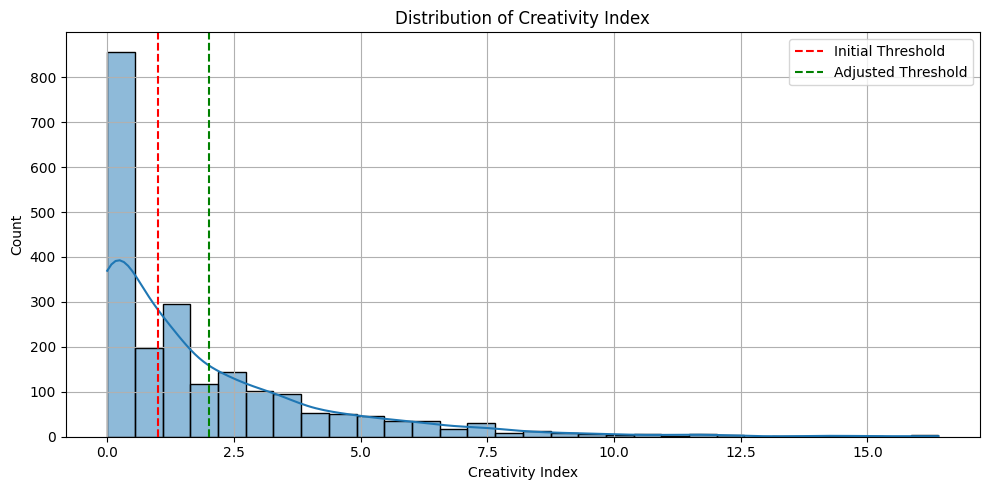

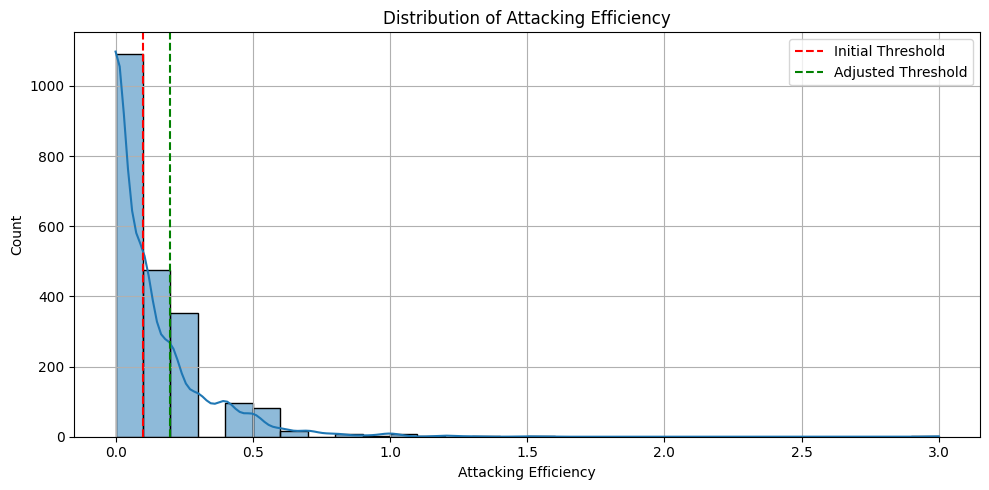

In [10]:
# Plot Creativity Index
plt.figure(figsize=(10, 5))
sns.histplot(df_featured['Creativity_Index'], kde=True, bins=30)
plt.axvline(1.0, color='red', linestyle='--', label='Initial Threshold')
plt.axvline(2.0, color='green', linestyle='--', label='Adjusted Threshold')
plt.title("Distribution of Creativity Index")
plt.xlabel("Creativity Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Attacking Efficiency
plt.figure(figsize=(10, 5))
sns.histplot(df_featured['Attacking_Efficiency'], kde=True, bins=30)
plt.axvline(0.1, color='red', linestyle='--', label='Initial Threshold')
plt.axvline(0.2, color='green', linestyle='--', label='Adjusted Threshold')
plt.title("Distribution of Attacking Efficiency")
plt.xlabel("Attacking Efficiency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()